## **Setup and Installation**

In [ ]:
!pip install kaggle

**Note** : Please create a Kaggle API token using your kaggle account and upload it here in collab or import in local setup


## **Dataset Import**

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download dudhaniomkarsanjay/dl-lab-3

Dataset URL: https://www.kaggle.com/datasets/dudhaniomkarsanjay/dl-lab-3
License(s): unknown
 98% 114M/116M [00:05<00:00, 29.3MB/s]
100% 116M/116M [00:05<00:00, 23.3MB/s]


In [ ]:
! unzip dl-lab-3.zip

Streaming output truncated to the last 5000 lines.
  inflating: aclImdb_v1/aclImdb/train/unsup/5506_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/5507_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/5508_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/5509_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/550_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/5510_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/5511_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/5512_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/5513_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/5514_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/5515_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/5516_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/5517_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/5518_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/5519_0.txt  
  inflating: aclImdb_v1/aclImdb/train/unsup/551_0.txt  
  inflating: aclImdb_v1/aclImdb/train/u

In [ ]:
!pip install torchtext==0.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.1 MB/s eta 0:00:00


## **Library Imports**

In [ ]:
import random
import time
import torch
from torch import nn, optim
from torchtext import data, datasets
import spacy
import pandas as pd
import os
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split as tts
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import pickle

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import torchsummary as summary

# **Part 1 : Binary classification { IMDB DATASET }**

## **Data preprocessing :**

In [ ]:
IMDB_pos = []
IMDB_neg = []

In [ ]:
folder_path = os.path.join('/content/aclImdb_v1/aclImdb/train','pos')
#os.listdir(folder_path)

In [ ]:
#file_contents = []
# Loop through all files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    # Ensure it is a file (and not a subdirectory)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            IMDB_pos.append(file.read())

In [ ]:
folder_path = os.path.join('/content/aclImdb_v1/aclImdb/train','neg')

In [ ]:
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    # Ensure it is a file (and not a subdirectory)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            IMDB_neg.append(file.read())

In [ ]:
dataa = {
    'review': IMDB_pos + IMDB_neg,  # Combine both lists into one
    'class': [1] * len(IMDB_pos) + [0] * len(IMDB_neg)  # Assign 1 for folder1, 0 for folder2
}

IMDB_Dataset = pd.DataFrame(dataa)
IMDB_Dataset = IMDB_Dataset.sample(frac=1).reset_index(drop=True)

In [ ]:
print(IMDB_Dataset)

                                                  review  class
0      Tremendous black--and-white nighttime cinemato...      1
1      Despite an overall pleasing plot and expensive...      0
2      Stunning. Absolutely stunning. This is a movie...      1
3      This movie was horrible. I swear they didn't e...      0
4      In the autobiographical coming-of-age tale "Ro...      0
...                                                  ...    ...
24995  I'm a fan of arty movies, but regretfully I ha...      0
24996  I went into this film expecting it to be simil...      0
24997  I rented this shortly after renting Ben Stein'...      0
24998  OK, here it is: "Nazi mountaineer befriends th...      0
24999  The Good Earth is a great movie!!!Everybody mu...      1

[25000 rows x 2 columns]


In [ ]:
# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
X = IMDB_Dataset.drop(columns='class')  # Features
y = IMDB_Dataset['class']
X_train, X_rem, y_train, y_rem = tts(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = tts(X_rem, y_rem, test_size=0.5, random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

train_df = pd.concat([X_train,y_train],axis = 1)
train_df = train_df.reset_index(drop=True)
test_df = pd.concat([X_test,y_test],axis = 1)
test_df = test_df.reset_index(drop=True)
valid_df = pd.concat([X_val,y_val],axis = 1)
valid_df = valid_df.reset_index(drop=True)


train_df = train_df.rename(columns={'review': 'text',
                        'class': 'label'})
test_df = test_df.rename(columns={'review': 'text',
                        'class': 'label'})
valid_df = valid_df.rename(columns={'review': 'text',
                        'class': 'label'})

In [ ]:
train_df.head()

,text,label
0,This adaptation positively butchers a classic ...,0
1,"I must say, when I read the storyline on the b...",0
2,You could say that the actors will make a movi...,0
3,I went to see Hamlet because I was in between ...,1
4,"I'm not quite sure why, but this movie just do...",0


In [ ]:
SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

np.random.seed(SEED)

## **Input features and tokenization :**

In [ ]:
SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

nlp = spacy.load("en_core_web_sm")

# Tokenize training data and count word frequencies
train_data = train_df['text']
word_freq = Counter()
for doc in train_data:
    tokens = [token.text.lower() for token in nlp(doc)]
    word_freq.update(tokens)

# Create vocabulary with words of frequency ≥ 5
vocab = {word for word, freq in word_freq.items() if freq >= 5}
vocab.add("UNK")  # Add "UNK" for out-of-vocabulary words
vocab.add("PAD")  # Add "PAD" for padding


In [ ]:
def tokenize_text(text, vocab):
    tokens = []
    for token in nlp(text):
        word = token.text.lower()
        if word in vocab:
            tokens.append(word)
        else:
            tokens.append("UNK")
    return tokens

# Apply tokenization to each split
train_df['tokens'] = train_df['text'].apply(lambda x: tokenize_text(x, vocab))
valid_df['tokens'] = valid_df['text'].apply(lambda x: tokenize_text(x, vocab))
test_df['tokens'] = test_df['text'].apply(lambda x: tokenize_text(x, vocab))


In [ ]:
# Calculate average token length of training data
average_length = int(train_df['tokens'].apply(len).mean())
print(f"Maximum length: {average_length}")

# Define padding function
def pad_tokens(tokens, max_length, pad_token="PAD"):
    if len(tokens) > max_length:
        return tokens[:max_length]
    return tokens + [pad_token] * (max_length - len(tokens))


Maximum length: 272


In [ ]:
train_df['padded_tokens'] = train_df['tokens'].apply(lambda x: pad_tokens(x, average_length))
valid_df['padded_tokens'] = valid_df['tokens'].apply(lambda x: pad_tokens(x, average_length))
test_df['padded_tokens'] = test_df['tokens'].apply(lambda x: pad_tokens(x, average_length))


In [ ]:
train_df.head(5)

,text,label,tokens,padded_tokens
0,This adaptation positively butchers a classic ...,0,"[this, adaptation, positively, butchers, a, cl...","[this, adaptation, positively, butchers, a, cl..."
1,"I must say, when I read the storyline on the b...",0,"[i, must, say, ,, when, i, read, the, storylin...","[i, must, say, ,, when, i, read, the, storylin..."
2,You could say that the actors will make a movi...,0,"[you, could, say, that, the, actors, will, mak...","[you, could, say, that, the, actors, will, mak..."
3,I went to see Hamlet because I was in between ...,1,"[i, went, to, see, hamlet, because, i, was, in...","[i, went, to, see, hamlet, because, i, was, in..."
4,"I'm not quite sure why, but this movie just do...",0,"[i, 'm, not, quite, sure, why, ,, but, this, m...","[i, 'm, not, quite, sure, why, ,, but, this, m..."


In [ ]:
print(train_df['label'].unique())

[0 1]


In [ ]:
print(f'Number of training examples: {len(train_df)}')
print(f'Number of validation examples: {len(valid_df)}')
print(f'Number of testing examples: {len(test_df)}')

Number of training examples: 20000
Number of validation examples: 2500
Number of testing examples: 2500


In [ ]:
train_df.to_pickle("train_tokenized_imdb.pkl")
valid_df.to_pickle("valid_tokenized_imdb.pkl")
test_df.to_pickle("test_tokenized_imdb.pkl")

In [ ]:
with open("vocab_imdb.pkl", "wb") as f:
    pickle.dump(vocab, f)

In [ ]:
train_df = pd.read_pickle("train_tokenized_imdb.pkl")
valid_df = pd.read_pickle("valid_tokenized_imdb.pkl")
test_df = pd.read_pickle("test_tokenized_imdb.pkl")
with open("vocab_imdb.pkl", "rb") as f:
    vocab = pickle.load(f)

In [ ]:
print(type(vocab))

<class 'set'>


In [ ]:
if isinstance(vocab, set):
    vocab = {word: idx for idx, word in enumerate(vocab)}
    # vocab['PAD'] = len(vocab)
    # vocab['UNK'] = len(vocab)


In [ ]:
train_df.head()

,text,label,tokens,padded_tokens
0,This adaptation positively butchers a classic ...,0,"[this, adaptation, positively, butchers, a, cl...","[this, adaptation, positively, butchers, a, cl..."
1,"I must say, when I read the storyline on the b...",0,"[i, must, say, ,, when, i, read, the, storylin...","[i, must, say, ,, when, i, read, the, storylin..."
2,You could say that the actors will make a movi...,0,"[you, could, say, that, the, actors, will, mak...","[you, could, say, that, the, actors, will, mak..."
3,I went to see Hamlet because I was in between ...,1,"[i, went, to, see, hamlet, because, i, was, in...","[i, went, to, see, hamlet, because, i, was, in..."
4,"I'm not quite sure why, but this movie just do...",0,"[i, 'm, not, quite, sure, why, ,, but, this, m...","[i, 'm, not, quite, sure, why, ,, but, this, m..."


In [ ]:
class CustomTextDataset(Dataset):
    def __init__(self, data_df, vocab, max_length):
        self.data = data_df
        self.vocab = vocab
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get tokens and label
        tokens = self.data.iloc[idx]['padded_tokens']
        label = self.data.iloc[idx]['label']

        # Convert tokens to indices
        token_indices = [self.vocab.get(token, self.vocab['UNK']) for token in tokens]

        # Convert to tensors
        token_tensor = torch.tensor(token_indices, dtype=torch.long)
        label_tensor = torch.tensor(label, dtype=torch.float)

        return token_tensor, label_tensor

    def get_text_tokens(self, idx):
        tokens = self.data.iloc[idx]['tokens']
        return tokens


In [ ]:
# Parameters
batch_size = 64
max_length = average_length  # This should match the padding length you've set during preprocessing

# Instantiate datasets
train_dataset = CustomTextDataset(train_df, vocab, max_length)
val_dataset = CustomTextDataset(valid_df, vocab, max_length)
test_dataset = CustomTextDataset(test_df, vocab, max_length)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [ ]:
class LSTMWithAttention(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pad_idx):
        super(LSTMWithAttention, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.attention = nn.Linear(hidden_dim, 1, bias=False)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)  # Shape: [batch_size, seq_length, embedding_dim]
        lstm_out, (h_n, c_n) = self.lstm(embedded)  # Shape: [batch_size, seq_length, hidden_dim]

        # Attention scores
        attention_scores = self.attention(lstm_out).squeeze(-1)  # Shape: [batch_size, seq_length]
        attention_weights = torch.softmax(attention_scores, dim=1)  # Normalize scores

        # Weighted sum of LSTM output
        attention_output = torch.sum(attention_weights.unsqueeze(-1) * lstm_out, dim=1)  # [batch_size, hidden_dim]

        # Classification
        logits = self.fc(attention_output)
        return self.sigmoid(logits).squeeze(1), attention_weights


In [ ]:
model = LSTMWithAttention(vocab_size=len(vocab), embedding_dim=100, hidden_dim=128, output_dim=1, pad_idx=vocab['PAD']).to(device)
summary(model, input_size=(input_length,), dtypes=[torch.long])


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMWithAttention(vocab_size=len(vocab), embedding_dim=100, hidden_dim=128, output_dim=1, pad_idx=vocab['PAD']).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Initialize metrics storage (including loss)
metrics = {'train_acc': [], 'train_precision': [], 'train_recall': [], 'train_f1': [], 'train_loss': [],
           'val_acc': [], 'val_precision': [], 'val_recall': [], 'val_f1': [], 'val_loss': []}
best_val_f1 = 0
best_model_state = None

def calculate_metrics(preds, labels):
    preds = (preds >= 0.5).float()
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, zero_division=1)
    recall = recall_score(labels, preds, zero_division=1)
    f1 = f1_score(labels, preds, zero_division=1)
    return accuracy, precision, recall, f1

# Training loop
epochs = 25
for epoch in range(epochs):
    model.train()
    train_acc, train_precision, train_recall, train_f1, train_loss = 0, 0, 0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float()
        optimizer.zero_grad()

        # Forward pass
        outputs, _ = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Calculate metrics
        acc, prec, rec, f1 = calculate_metrics(outputs.cpu().detach(), labels.cpu())
        train_acc += acc
        train_precision += prec
        train_recall += rec
        train_f1 += f1
        train_loss += loss.item()

    # Average metrics over batches
    metrics['train_acc'].append(train_acc / len(train_loader))
    metrics['train_precision'].append(train_precision / len(train_loader))
    metrics['train_recall'].append(train_recall / len(train_loader))
    metrics['train_f1'].append(train_f1 / len(train_loader))
    metrics['train_loss'].append(train_loss / len(train_loader))

    # Validation
    model.eval()
    val_acc, val_precision, val_recall, val_f1, val_loss = 0, 0, 0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()
            outputs, _ = model(inputs)

            loss = criterion(outputs, labels)
            acc, prec, rec, f1 = calculate_metrics(outputs.cpu(), labels.cpu())
            val_acc += acc
            val_precision += prec
            val_recall += rec
            val_f1 += f1
            val_loss += loss.item()

    # Average validation metrics
    metrics['val_acc'].append(val_acc / len(val_loader))
    metrics['val_precision'].append(val_precision / len(val_loader))
    metrics['val_recall'].append(val_recall / len(val_loader))
    metrics['val_f1'].append(val_f1 / len(val_loader))
    metrics['val_loss'].append(val_loss / len(val_loader))

    # Save best model based on F1 score
    if metrics['val_f1'][-1] > best_val_f1:
        best_val_f1 = metrics['val_f1'][-1]
        best_model_state = model.state_dict()

    print(f"Epoch {epoch+1}: Train Loss={metrics['train_loss'][-1]:.4f}, Train Acc={metrics['train_acc'][-1]:.4f}, "
          f"Train F1={metrics['train_f1'][-1]:.4f}, Val Loss={metrics['val_loss'][-1]:.4f}, "
          f"Val Acc={metrics['val_acc'][-1]:.4f}, Val F1={metrics['val_f1'][-1]:.4f}")

# Load best model weights
model.load_state_dict(best_model_state)

Epoch 1: Train Loss=0.6254, Train Acc=0.6601, Train F1=0.6335, Val Loss=0.4949, Val Acc=0.7621, Val F1=0.7564
Epoch 2: Train Loss=0.3814, Train Acc=0.8300, Train F1=0.8280, Val Loss=0.3586, Val Acc=0.8363, Val F1=0.8377
Epoch 3: Train Loss=0.2536, Train Acc=0.8949, Train F1=0.8938, Val Loss=0.3270, Val Acc=0.8559, Val F1=0.8507
Epoch 4: Train Loss=0.1839, Train Acc=0.9313, Train F1=0.9301, Val Loss=0.3278, Val Acc=0.8648, Val F1=0.8607
Epoch 5: Train Loss=0.1240, Train Acc=0.9559, Train F1=0.9559, Val Loss=0.3937, Val Acc=0.8629, Val F1=0.8569
Epoch 6: Train Loss=0.0765, Train Acc=0.9744, Train F1=0.9743, Val Loss=0.4451, Val Acc=0.8574, Val F1=0.8411
Epoch 7: Train Loss=0.0419, Train Acc=0.9873, Train F1=0.9871, Val Loss=0.5534, Val Acc=0.8570, Val F1=0.8426
Epoch 8: Train Loss=0.0285, Train Acc=0.9919, Train F1=0.9919, Val Loss=0.6356, Val Acc=0.8492, Val F1=0.8504
Epoch 9: Train Loss=0.0190, Train Acc=0.9949, Train F1=0.9947, Val Loss=0.6805, Val Acc=0.8566, Val F1=0.8426
Epoch 10: 

<All keys matched successfully>

In [ ]:
torch.save(best_model_state, '/content/lstm_imdb.pth')

In [ ]:
# Ensure model is in evaluation mode
model.load_state_dict(torch.load('lstm_imdb.pth'))
# model.eval()model.load_state_dict(best_model_state)
model.eval()
test_acc, test_precision, test_recall, test_f1 = 0, 0, 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device).float()
        outputs, _ = model(inputs)
        acc, prec, rec, f1 = calculate_metrics(outputs.cpu(), labels.cpu())
        test_acc += acc
        test_precision += prec
        test_recall += rec
        test_f1 += f1

test_acc /= len(test_loader)
test_precision /= len(test_loader)
test_recall /= len(test_loader)
test_f1 /= len(test_loader)

print(f"Final Test Metrics: Accuracy={test_acc:.4f}, Precision={test_precision:.4f}, Recall={test_recall:.4f}, F1 Score={test_f1:.4f}")

<ipython-input-112-2c9ad150ed54>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('lstm_imdb.pth'))


Final Test Metrics: Accuracy=0.8766, Precision=0.8800, Recall=0.8721, F1 Score=0.8746


In [ ]:
def plot_attention_with_prediction(comment, model, vocab, max_length, device, nlp, num_rows=None, chunk_size=10):
    # Tokenize and process the comment
    tokens = [token.text.lower() if token.text.lower() in vocab else "UNK" for token in nlp(comment)]
    tokens = tokens[:max_length] if len(tokens) > max_length else tokens + ["PAD"] * (max_length - len(tokens))
    token_indices = [vocab.get(token, vocab['UNK']) for token in tokens]
    token_tensor = torch.tensor(token_indices, dtype=torch.long).unsqueeze(0).to(device)

    # Get model predictions and attention weights
    model.eval()
    with torch.no_grad():
        prediction, attention_weights = model(token_tensor)
        predicted_label = "Positive" if prediction.item() >= 0.5 else "Negative"

    # Prepare attention weights and tokens for visualization
    attention_weights = attention_weights.squeeze(0).cpu().numpy()  # Shape: [seq_length]
    num_chunks = (len(tokens) + chunk_size - 1) // chunk_size  # Calculate the number of rows needed

    attention_chunks = np.array_split(attention_weights, num_chunks)
    token_chunks = [tokens[i * chunk_size:(i + 1) * chunk_size] for i in range(num_chunks)]

    # If num_rows is specified, limit the number of chunks to plot
    if num_rows is not None:
        attention_chunks = attention_chunks[:num_rows]
        token_chunks = token_chunks[:num_rows]

    # Ensure that all chunks have the same length by padding with NaN values where needed
    max_chunk_length = max(len(chunk) for chunk in attention_chunks)
    attention_chunks_padded = [np.pad(chunk, (0, max_chunk_length - len(chunk)), constant_values=np.nan)
                               for chunk in attention_chunks]

    # Pad token chunks to have equal length
    token_chunks_padded = [chunk + [''] * (max_chunk_length - len(chunk)) for chunk in token_chunks]

    # Plot stacked attention heatmap
    fig, ax = plt.subplots(figsize=(16, 2 * len(attention_chunks)))
    sns.heatmap(attention_chunks_padded, annot=token_chunks_padded, fmt="", cmap="YlGnBu", cbar=True, ax=ax, xticklabels=False)
    ax.set_title(f"Attention Map for Comment - Predicted Label: {predicted_label}")
    ax.set_yticklabels([f"Row {i+1}" for i in range(len(attention_chunks))], rotation=0)
    plt.show()




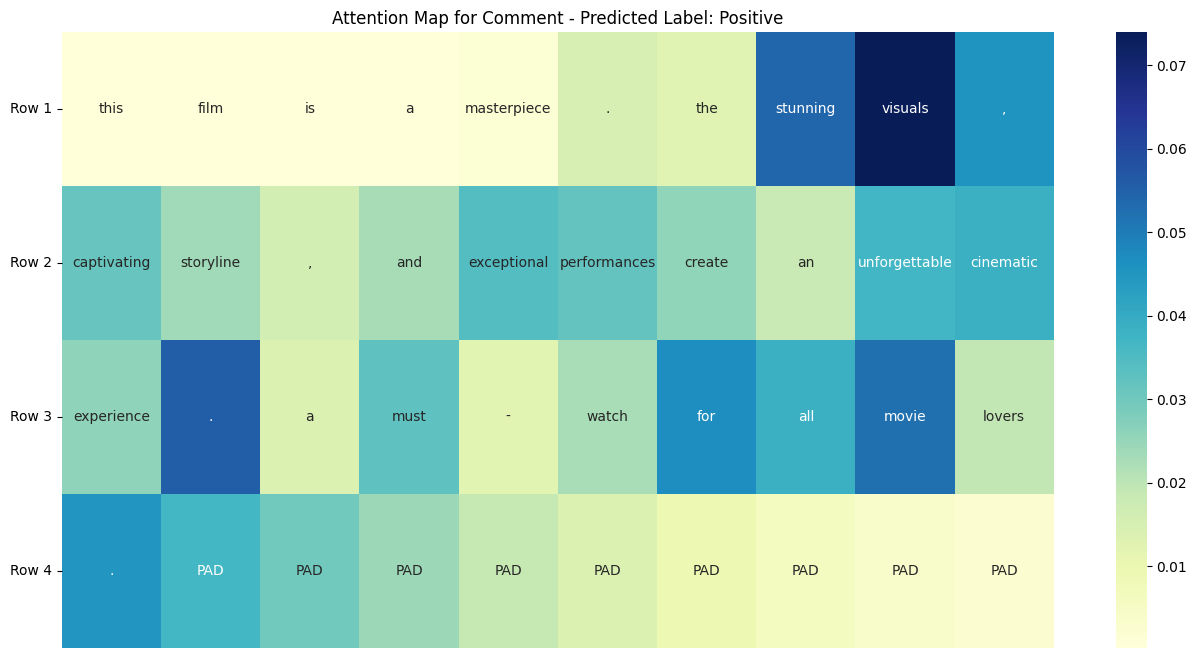

In [ ]:
comment = "This film is a masterpiece. The stunning visuals, captivating storyline, and exceptional performances create an unforgettable cinematic experience. A must-watch for all movie lovers."
plot_attention_with_prediction(comment, model, vocab, average_length, device, nlp, num_rows=4, chunk_size=10)


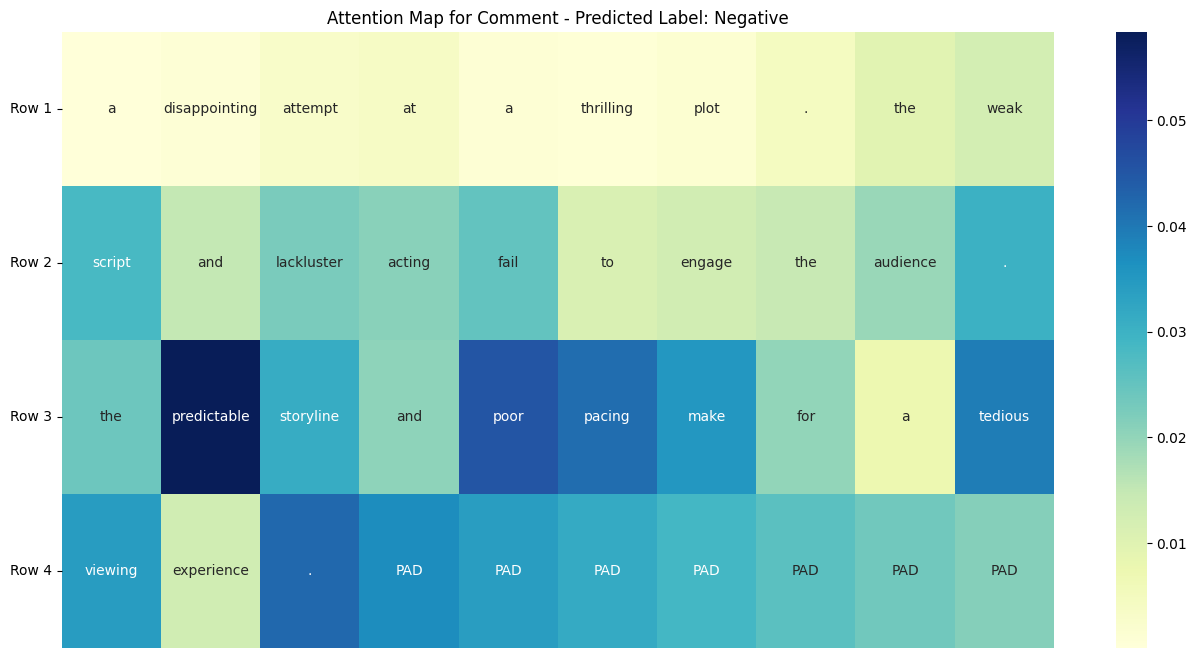

In [ ]:
comment = "A disappointing attempt at a thrilling plot. The weak script and lackluster acting fail to engage the audience. The predictable storyline and poor pacing make for a tedious viewing experience."
plot_attention_with_prediction(comment, model, vocab, average_length, device, nlp, num_rows=4, chunk_size=10)


In [ ]:
epochs = range(1, len(metrics['train_acc']) + 1)

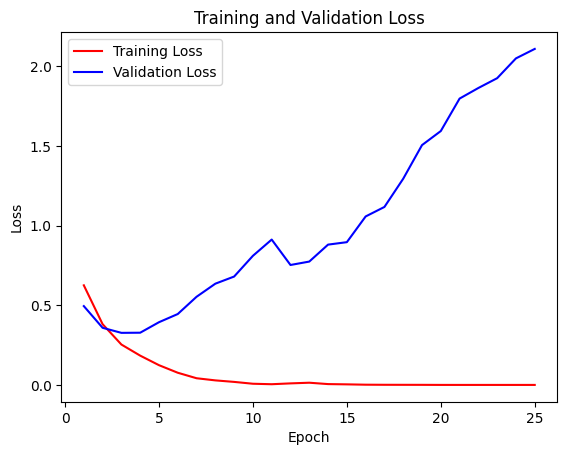

In [ ]:
plt.plot(epochs, metrics['train_loss'], label='Training Loss', color = 'red')

# Plot the validation loss
plt.plot(epochs, metrics['val_loss'], label='Validation Loss', color = 'blue')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')


# Add a legend
plt.legend()

# Show the plot
plt.show()

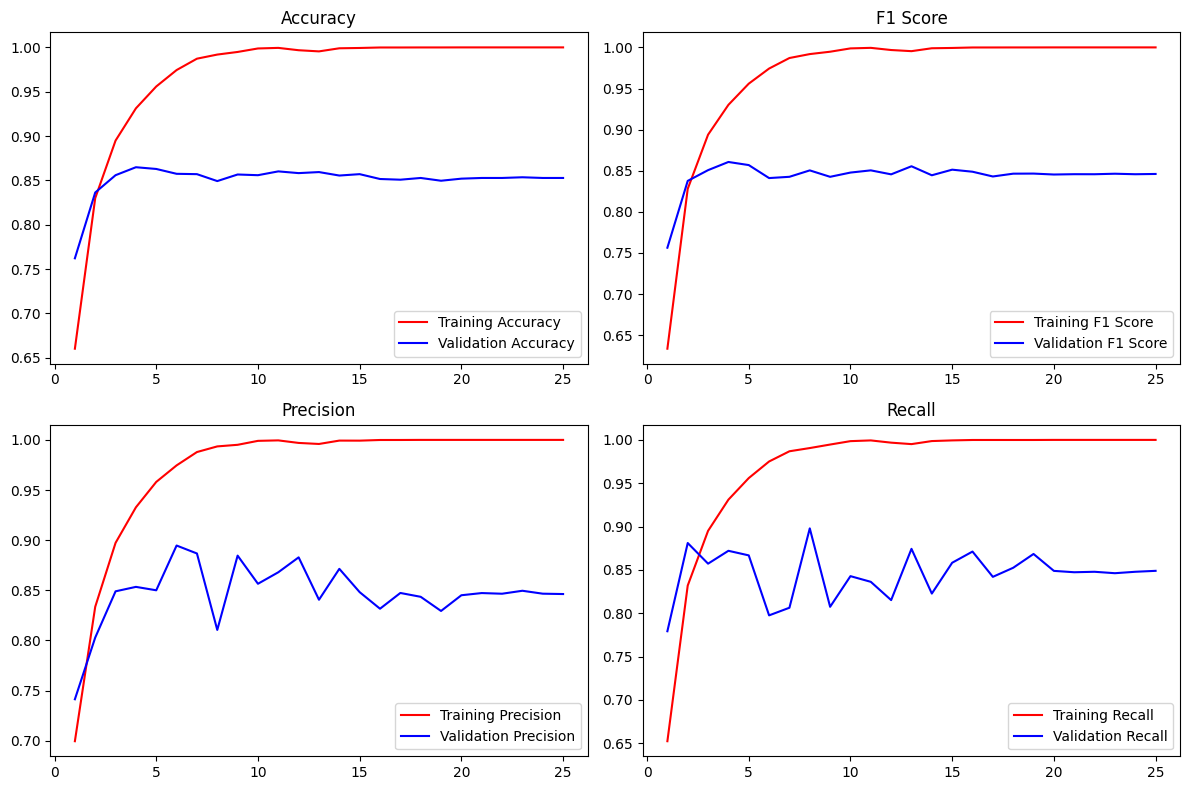

In [ ]:

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs, metrics['train_acc'], label='Training Accuracy',color = 'red')
plt.plot(epochs, metrics['val_acc'], label='Validation Accuracy',color = 'blue')
plt.title('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, metrics['train_f1'], label='Training F1 Score',color = 'red')
plt.plot(epochs, metrics['val_f1'], label='Validation F1 Score',color = 'blue')
plt.title('F1 Score')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, metrics['train_precision'], label='Training Precision',color = 'red')
plt.plot(epochs, metrics['val_precision'], label='Validation Precision',color = 'blue')
plt.title('Precision')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, metrics['train_recall'], label='Training Recall',color = 'red')
plt.plot(epochs, metrics['val_recall'], label='Validation Recall',color = 'blue')
plt.title('Recall')
plt.legend()

plt.tight_layout()
plt.show()

# **Part 2 : MULTICLASS CLASSIFICATION { SEMVAL DATASET }**


## **Dataset Preprocessing :**

In [ ]:
kp = pd.read_csv('/content/semeval-2013-train-all.csv', on_bad_lines='skip')

In [ ]:
kp = kp.rename(columns={'label\ttext': 'mashed_column'})


#print(kp.columns)
# Split the mashed column into 'label' and 'text'
kp[['label', 'text']] = kp['mashed_column'].str.split('\t',n=1, expand=True)
kp = kp.drop(columns=['mashed_column'])

In [ ]:
kp.head()

,label,text
0,1,One Night like In Vegas I make dat Nigga Famous
1,1,Walking through Chelsea at this time of day is...
2,-1,looking at the temp outside....hpw did it get ...
3,-1,I'm stuck in London again... :( I don't wanna ...
4,1,It's 2.32 a.m. here in Italy now :) Tomorrow o...


In [ ]:
semval_train = kp.sample(frac=1).reset_index(drop=True)

In [ ]:
X = kp['text']
y = kp['label']


X_train, X_val, y_train, y_val = tts(X, y, test_size=0.2, random_state=42)


semval_train_data = pd.DataFrame({'text': X_train, 'label': y_train})
semval_val_data = pd.DataFrame({'text': X_val, 'label': y_val})


In [ ]:
semval_train_data = semval_train_data.reset_index(drop=True)
semval_train_data['label'] = semval_train_data['label'].astype(int) + 1
semval_train_data.head()


,text,label
0,The earth is run by psychopathsKids could be e...,0
1,@StarfmZimbabwe News from the US The statues o...,0
2,Real committed to watch Netflix all day Wednesday,2
3,yo I'm excited for Royal Rumble might book tha...,2
4,They're showing the Motown 25th on PBS. Michae...,2


In [ ]:
semval_val_data = semval_val_data.reset_index(drop=True)

semval_val_data['label'] = semval_val_data['label'].astype(int) + 1
semval_val_data.head()

,text,label
0,Fidel Castro must of had information on the Cl...,1
1,Just a typical Friday night spent @ TGIF w/ th...,2
2,Paul Dunne is Irish not British. I guess BBC w...,0
3,@CR2News Demi is performing at the Houston Rod...,1
4,Saturday kitchen the moment Chris Evans ruins ...,0


In [ ]:
semval_test = pd.read_csv('/content/semeval-2013-dev.csv', on_bad_lines='skip')

In [ ]:
semval_test = semval_test.rename(columns={'label\ttext': 'mashed_column'})


#print(kp.columns)
# Split the mashed column into 'label' and 'text'
semval_test[['label', 'text']] = semval_test['mashed_column'].str.split('\t',n=1, expand=True)
semval_test_data = semval_test.drop(columns=['mashed_column'])
semval_test_data = semval_test_data[['text', 'label']]
semval_test_data['label'] = semval_test_data['label'].astype(int) + 1

In [ ]:
semval_train_data['label'].unique()

array([0, 2, 1])

In [ ]:
semval_test_data['label'].unique()

array([1, 2, 0])

In [ ]:
semval_val_data['label'].unique()

array([1, 2, 0])

In [ ]:
semval_test_data.head()

,text,label
0,Watching Devil Inside for the 1st time tonight...,1
1,Off to do my vlog. Watching Devil Inside and J...,1
2,@raykipo take Silver at the Hib cup. Great day...,2
3,@hollyhippo I'm going to blockbuster tomorrow ...,1
4,Watching Devil Inside for the 2nd time and I'm...,1


## **Input features and tokenization :**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

nlp = spacy.load("en_core_web_sm")

def tokenize_text(text, vocab):
    """Tokenize text and replace out-of-vocabulary words with "UNK"."""
    tokens = []
    for token in nlp(text):
        word = token.text.lower()
        if word in vocab:
            tokens.append(word)
        else:
            tokens.append("UNK")
    return tokens

def pad_tokens(tokens, max_length, pad_token="PAD"):
    """Pad a list of tokens to a fixed length."""
    if len(tokens) > max_length:
        return tokens[:max_length]
    return tokens + [pad_token] * (max_length - len(tokens))

In [ ]:
def preprocess_data(train_df, valid_df, test_df):
    """Preprocess text data for a 3-class classification problem."""
    # Tokenize training data and count word frequencies
    train_data = train_df['text']
    word_freq = Counter()
    for doc in train_data:
        tokens = [token.text.lower() for token in nlp(doc)]
        word_freq.update(tokens)

    # Create vocabulary with words of frequency ≥ 5
    vocab = {word for word, freq in word_freq.items() if freq >= 5}
    vocab.add("UNK")
    vocab.add("PAD")

    # Apply tokenization and padding to each split
    train_df['tokens'] = train_df['text'].apply(lambda x: tokenize_text(x, vocab))
    valid_df['tokens'] = valid_df['text'].apply(lambda x: tokenize_text(x, vocab))
    test_df['tokens'] = test_df['text'].apply(lambda x: tokenize_text(x, vocab))

    # Calculate average token length of training data
    average_length = int(train_df['tokens'].apply(len).mean())

    train_df['padded_tokens'] = train_df['tokens'].apply(lambda x: pad_tokens(x, average_length))
    valid_df['padded_tokens'] = valid_df['tokens'].apply(lambda x: pad_tokens(x, average_length))
    test_df['padded_tokens'] = test_df['tokens'].apply(lambda x: pad_tokens(x, average_length))

    # Convert vocabulary to a dictionary
    vocab = {word: idx for idx, word in enumerate(vocab)}

    return train_df, valid_df, test_df, vocab, average_length

In [ ]:
train_df,valid_df,test_df,vocab,average_length = preprocess_data(semval_train_data,semval_val_data,semval_test_data)


In [ ]:
class CustomTextDataset(Dataset):
    def __init__(self, data_df, vocab, max_length):
        self.data = data_df
        self.vocab = vocab
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get tokens and label
        tokens = self.data.iloc[idx]['padded_tokens']
        label = self.data.iloc[idx]['label']

        # Convert tokens to indices
        token_indices = [self.vocab.get(token, self.vocab['UNK']) for token in tokens]

        # Convert to tensors
        token_tensor = torch.tensor(token_indices, dtype=torch.long)
        label_tensor = torch.tensor(label, dtype=torch.long)

        return token_tensor, label_tensor

    def get_text_tokens(self, idx):
        tokens = self.data.iloc[idx]['tokens']
        return tokens



In [ ]:
# Parameters
batch_size = 64
max_length = average_length  # This should match the padding length you've set during preprocessing

# Instantiate datasets
train_dataset = CustomTextDataset(train_df, vocab, max_length)
val_dataset = CustomTextDataset(valid_df, vocab, max_length)
test_dataset = CustomTextDataset(test_df, vocab, max_length)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
class LSTMWithAttention(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pad_idx):
        super(LSTMWithAttention, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.attention = nn.Linear(hidden_dim, 1, bias=False)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        embedded = self.embedding(x)  # Shape: [batch_size, seq_length, embedding_dim]
        lstm_out, (h_n, c_n) = self.lstm(embedded)  # Shape: [batch_size, seq_length, hidden_dim]

        # Attention scores
        attention_scores = self.attention(lstm_out).squeeze(-1)  # Shape: [batch_size, seq_length]
        attention_weights = torch.softmax(attention_scores, dim=1)  # Normalize scores

        # Weighted sum of LSTM output
        attention_output = torch.sum(attention_weights.unsqueeze(-1) * lstm_out, dim=1)  # [batch_size, hidden_dim]

        # Classification
        logits = self.fc(attention_output)
        return self.softmax(logits), attention_weights


In [ ]:
def calculate_metrics(preds, labels):
    _, preds = torch.max(preds, 1)
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='macro', zero_division=1)
    recall = recall_score(labels, preds, average='macro', zero_division=1)
    f1 = f1_score(labels, preds, average='macro', zero_division=1)
    return accuracy, precision, recall, f1

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMWithAttention(vocab_size=len(vocab), embedding_dim=100, hidden_dim=128, output_dim=3, pad_idx=vocab['PAD']).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [ ]:
print(device)

cuda


In [ ]:
metrics = {'train_acc': [], 'train_precision': [], 'train_recall': [], 'train_f1': [], 'train_loss': [],
           'val_acc': [], 'val_precision': [], 'val_recall': [], 'val_f1': [], 'val_loss': []}
best_val_f1 = 0
best_model_state = None

epochs = 25
for epoch in range(epochs):
    model.train()
    train_acc, train_precision, train_recall, train_f1, train_loss = 0, 0, 0, 0, 0
    for inputs, labels in train_loader:
        try:
            inputs, labels = inputs.to(device), labels.to(device)
        except RuntimeError as e:
            print(f"Error: {e}")
            print(f"Input shape: {inputs.shape}, Label shape: {labels.shape}")
            print(f"Input dtype: {inputs.dtype}, Label dtype: {labels.dtype}")
            raise e

        optimizer.zero_grad()

        # Forward pass
        outputs, _ = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Calculate metrics
        acc, prec, rec, f1 = calculate_metrics(outputs.cpu(), labels.cpu())
        train_acc += acc
        train_precision += prec
        train_recall += rec
        train_f1 += f1
        train_loss += loss.item()

    # Average metrics over batches
    metrics['train_acc'].append(train_acc / len(train_loader))
    metrics['train_precision'].append(train_precision / len(train_loader))
    metrics['train_recall'].append(train_recall / len(train_loader))
    metrics['train_f1'].append(train_f1 / len(train_loader))
    metrics['train_loss'].append(train_loss / len(train_loader))

    # Validation
    model.eval()
    val_acc, val_precision, val_recall, val_f1, val_loss = 0, 0, 0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs, _ = model(inputs)

            loss = criterion(outputs, labels)
            acc, prec, rec, f1 = calculate_metrics(outputs.cpu(), labels.cpu())
            val_acc += acc
            val_precision += prec
            val_recall += rec
            val_f1 += f1
            val_loss += loss.item()

    # Average validation metrics
    metrics['val_acc'].append(val_acc / len(val_loader))
    metrics['val_precision'].append(val_precision / len(val_loader))
    metrics['val_recall'].append(val_recall / len(val_loader))
    metrics['val_f1'].append(val_f1 / len(val_loader))
    metrics['val_loss'].append(val_loss / len(val_loader))

    # Save best model based on F1 score
    if metrics['val_f1'][-1] > best_val_f1:
        best_val_f1 = metrics['val_f1'][-1]
        best_model_state = model.state_dict()

    print(f"Epoch {epoch+1}: Train Loss={metrics['train_loss'][-1]:.4f}, Train Acc={metrics['train_acc'][-1]:.4f}, "
          f"Train F1={metrics['train_f1'][-1]:.4f}, Val Loss={metrics['val_loss'][-1]:.4f}, "
          f"Val Acc={metrics['val_acc'][-1]:.4f}, Val F1={metrics['val_f1'][-1]:.4f}")


Epoch 1: Train Loss=0.9878, Train Acc=0.5424, Train F1=0.3813, Val Loss=0.9638, Val Acc=0.5718, Val F1=0.4061
Epoch 2: Train Loss=0.9361, Train Acc=0.6001, Train F1=0.4602, Val Loss=0.9404, Val Acc=0.5934, Val F1=0.4859
Epoch 3: Train Loss=0.8931, Train Acc=0.6438, Train F1=0.5703, Val Loss=0.9261, Val Acc=0.6077, Val F1=0.5414
Epoch 4: Train Loss=0.8539, Train Acc=0.6895, Train F1=0.6386, Val Loss=0.9185, Val Acc=0.6146, Val F1=0.5673
Epoch 5: Train Loss=0.8211, Train Acc=0.7260, Train F1=0.6855, Val Loss=0.9212, Val Acc=0.6179, Val F1=0.5683
Epoch 6: Train Loss=0.7960, Train Acc=0.7537, Train F1=0.7193, Val Loss=0.9245, Val Acc=0.6134, Val F1=0.5747
Epoch 7: Train Loss=0.7772, Train Acc=0.7727, Train F1=0.7421, Val Loss=0.9262, Val Acc=0.6163, Val F1=0.5726
Epoch 8: Train Loss=0.7588, Train Acc=0.7924, Train F1=0.7646, Val Loss=0.9257, Val Acc=0.6156, Val F1=0.5647
Epoch 9: Train Loss=0.7454, Train Acc=0.8062, Train F1=0.7796, Val Loss=0.9290, Val Acc=0.6140, Val F1=0.5729
Epoch 10: 

In [ ]:
torch.save(best_model_state, '/content/lstm_semval.pth')

In [ ]:
model.load_state_dict(best_model_state)

# torch.save(best_model_state, '/content/lstm_three_class.pth')

# Ensure model is in evaluation mode
model.load_state_dict(torch.load('/content/lstm_semval.pth'))
model.eval()
test_acc, test_precision, test_recall, test_f1 = 0, 0, 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs, _ = model(inputs)
        acc, prec, rec, f1 = calculate_metrics(outputs.cpu(), labels.cpu())
        test_acc += acc
        test_precision += prec
        test_recall += rec
        test_f1 += f1

test_acc /= len(test_loader)
test_precision /= len(test_loader)
test_recall /= len(test_loader)
test_f1 /= len(test_loader)

print(f"Final Test Metrics: Accuracy={test_acc:.4f}, Precision={test_precision:.4f}, Recall={test_recall:.4f}, F1 Score={test_f1:.4f}")


<ipython-input-38-4cabd73f7014>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/lstm_semval.pth'))


Final Test Metrics: Accuracy=0.8074, Precision=0.8305, Recall=0.7749, F1 Score=0.7862


In [ ]:

def visualize_attention_heatmap(model, tokenizer, comment, vocab, max_length, device='cpu'):

    tokens = tokenizer(comment, vocab)
    tokens = tokens[:max_length] if len(tokens) > max_length else tokens + ["PAD"] * (max_length - len(tokens))
    token_indices = [vocab.get(token, vocab['UNK']) for token in tokens]
    input_tensor = torch.tensor(token_indices).unsqueeze(0).to(device)  # Add batch dimension

    # Pass through the model and get prediction and attention weights
    model.eval()
    with torch.no_grad():
        prediction, attention_weights = model(input_tensor)

    # Determine the predicted label and map it to sentiment
    predicted_class = torch.argmax(prediction, dim=1).item()
    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    predicted_label = sentiment_map[predicted_class]

    # Convert attention weights to numpy for visualization
    attention_weights = attention_weights.squeeze(0).cpu().numpy()

    # Arrange tokens and attention weights into a grid-like structure (e.g., 2 rows)
    chunk_size = (len(tokens) + 1) // 2
    token_chunks = [tokens[i * chunk_size:(i + 1) * chunk_size] for i in range(2)]
    attention_chunks = [attention_weights[i * chunk_size:(i + 1) * chunk_size] for i in range(2)]

    # Pad chunks to ensure they have equal length
    max_len = max(len(chunk) for chunk in token_chunks)
    token_chunks = [chunk + [''] * (max_len - len(chunk)) for chunk in token_chunks]
    attention_chunks = [np.pad(chunk, (0, max_len - len(chunk)), constant_values=np.nan) for chunk in attention_chunks]

    # Plot heatmap with the predicted sentiment as title
    plt.figure(figsize=(10, 2))
    sns.heatmap(attention_chunks, annot=token_chunks, fmt="", cmap="YlGnBu", cbar=False,
                linewidths=.5, linecolor='gray', annot_kws={"ha": "center", "va": "center"})
    plt.title(f"Attention Map for Comment - Predicted Sentiment: {predicted_label}")
    plt.axis('off')
    plt.show()


In [ ]:
comment0 = "I absolutely loved this product! It exceeded my expectations, and the quality is fantastic. Would definitely recommend to everyone!"

comment1 = "The product arrived on time and as described. It's okay, nothing special, but it does the job for now."

comment2 = "I'm really disappointed with this purchase. The quality is poor, and it didn’t work as advertised. I wouldn’t buy it again."

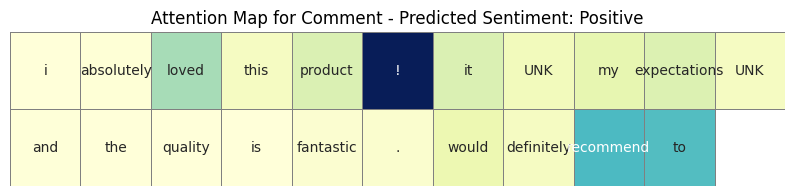

In [ ]:
visualize_attention_heatmap(model, tokenize_text, comment0, vocab, max_length=average_length, device=device)

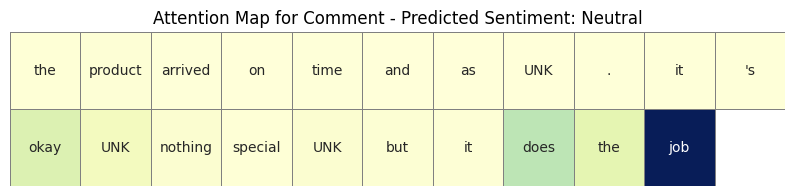

In [ ]:
visualize_attention_heatmap(model, tokenize_text, comment1, vocab, max_length=average_length, device=device)

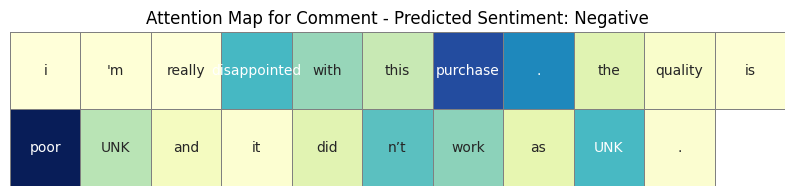

In [ ]:
visualize_attention_heatmap(model, tokenize_text, comment2, vocab, max_length=average_length, device=device)

In [ ]:
epochs = range(1, len(metrics['train_acc']) + 1)

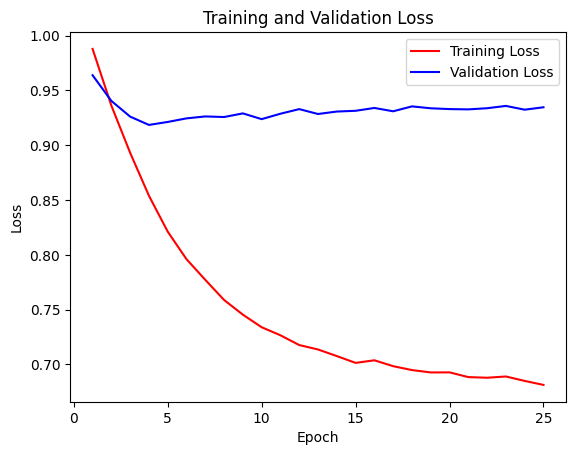

In [ ]:
plt.plot(epochs, metrics['train_loss'], label='Training Loss', color = 'red')

# Plot the validation loss
plt.plot(epochs, metrics['val_loss'], label='Validation Loss', color = 'blue')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')


# Add a legend
plt.legend()

# Show the plot
plt.show()

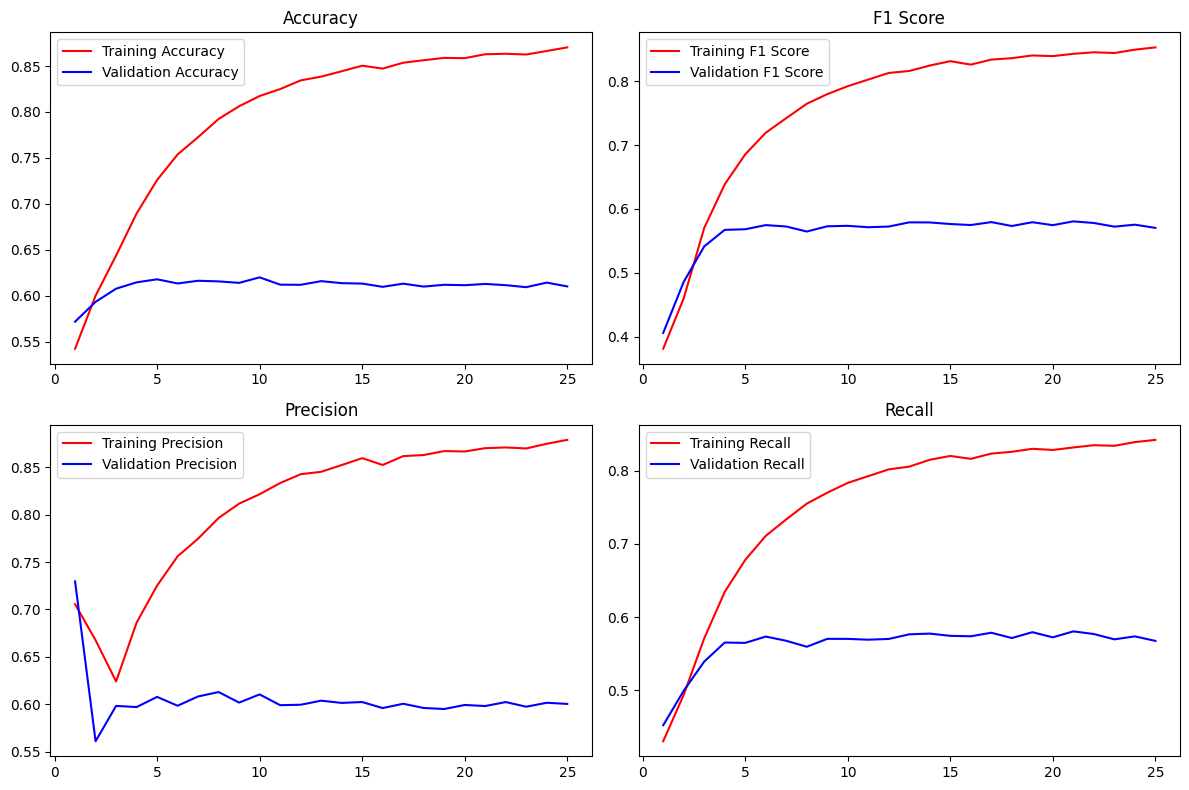

In [ ]:

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs, metrics['train_acc'], label='Training Accuracy',color = 'red')
plt.plot(epochs, metrics['val_acc'], label='Validation Accuracy',color = 'blue')
plt.title('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, metrics['train_f1'], label='Training F1 Score',color = 'red')
plt.plot(epochs, metrics['val_f1'], label='Validation F1 Score',color = 'blue')
plt.title('F1 Score')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, metrics['train_precision'], label='Training Precision',color = 'red')
plt.plot(epochs, metrics['val_precision'], label='Validation Precision',color = 'blue')
plt.title('Precision')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, metrics['train_recall'], label='Training Recall',color = 'red')
plt.plot(epochs, metrics['val_recall'], label='Validation Recall',color = 'blue')
plt.title('Recall')
plt.legend()

plt.tight_layout()
plt.show()